# Introduction

In this notebook, we will explore the Home Credit default risk machine learning competition currently available on Kaggle. The competition's aim is to use historical loan application data to forecast whether an applicant can repay a loan. This is a standard supervised classification task, meaning that the labels are part of the training data and the goal is to teach a model to anticipate the labels from the features. The label is a binary variable, 0 (repay loan on time) and 1 (difficulty repaying loan).

Home Credit, a credit service for the unbanked population, provides the data for this project. The ability to anticipate if a client will repay a loan or face challenges is a crucial business requirement. To aid in this task, Home Credit is hosting a competition on Kaggle to discover the models that the machine learning community can develop.

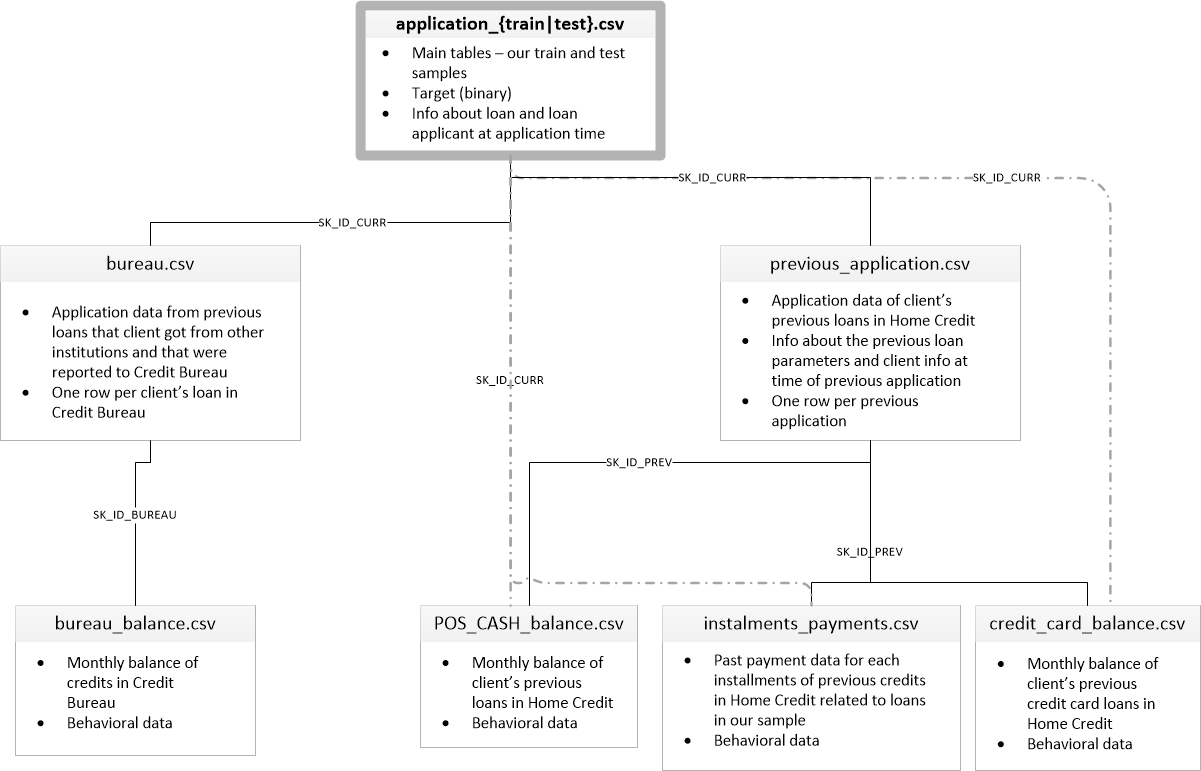

## Imports

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization
import my_functions
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

## Data extraction

### Dataframe: 'application_test'

In [2]:
application_test = pd.read_csv('data/application_test.csv')
application_test.sample(20, random_state=1234)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
4171,129790,Cash loans,F,N,N,0,121500.0,502497.0,28975.5,454500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
36811,369424,Cash loans,F,N,N,0,472500.0,900000.0,29034.0,900000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0
19064,238492,Cash loans,F,Y,Y,0,225000.0,500490.0,52686.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
19892,244460,Cash loans,F,N,Y,0,121500.0,180000.0,11632.5,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
20634,249677,Cash loans,M,Y,N,2,180000.0,427176.0,23301.0,306000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5288,138652,Cash loans,M,N,Y,0,108000.0,495000.0,25402.5,495000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
28458,307699,Cash loans,F,N,Y,0,315000.0,260640.0,26838.0,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
20325,247607,Cash loans,F,N,Y,0,75964.5,270000.0,11272.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
507,103541,Cash loans,F,N,Y,0,315000.0,790830.0,62613.0,675000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5161,137595,Cash loans,F,N,N,0,112500.0,539100.0,29376.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


#### Information

In [3]:
application_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 121 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  int64  
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_FAMILY_STATUS            object 
 14   NAME_HOUSING_TYPE             object 
 15   REGION_POPULATION_RELATIVE    float64
 16   DAYS_BIRTH                    int64  
 17   DAYS_EMPLOYED                 int64  
 18   DAYS

#### Null Values

In [4]:
application_test.isnull().sum().sort_values(ascending=False)/application_test.shape[0]

COMMONAREA_AVG              0.687161
COMMONAREA_MODE             0.687161
COMMONAREA_MEDI             0.687161
NONLIVINGAPARTMENTS_AVG     0.684125
NONLIVINGAPARTMENTS_MODE    0.684125
                              ...   
NAME_HOUSING_TYPE           0.000000
NAME_FAMILY_STATUS          0.000000
NAME_EDUCATION_TYPE         0.000000
NAME_INCOME_TYPE            0.000000
SK_ID_CURR                  0.000000
Length: 121, dtype: float64

In [5]:
missing_values = my_functions.missing_values_table(application_test)
missing_values.head(50)

Your selected dataframe has 121 columns.
There are 64 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MODE,33495,68.7
COMMONAREA_MEDI,33495,68.7
COMMONAREA_AVG,33495,68.7
NONLIVINGAPARTMENTS_MEDI,33347,68.4
NONLIVINGAPARTMENTS_AVG,33347,68.4
NONLIVINGAPARTMENTS_MODE,33347,68.4
FONDKAPREMONT_MODE,32797,67.3
LIVINGAPARTMENTS_MODE,32780,67.2
LIVINGAPARTMENTS_MEDI,32780,67.2
LIVINGAPARTMENTS_AVG,32780,67.2


In [6]:
application_test.sum(numeric_only=True).sort_values().head(20)

DAYS_BIRTH                  -783222716.0
DAYS_REGISTRATION           -242143264.0
DAYS_ID_PUBLISH             -148752696.0
DAYS_LAST_PHONE_CHANGE       -52534637.0
FLAG_DOCUMENT_15                     0.0
FLAG_DOCUMENT_14                     0.0
FLAG_DOCUMENT_2                      0.0
FLAG_DOCUMENT_16                     0.0
FLAG_DOCUMENT_19                     0.0
FLAG_DOCUMENT_10                     0.0
FLAG_DOCUMENT_12                     0.0
FLAG_DOCUMENT_17                     0.0
FLAG_DOCUMENT_21                     0.0
FLAG_DOCUMENT_13                     0.0
FLAG_DOCUMENT_20                     0.0
FLAG_DOCUMENT_7                      2.0
FLAG_DOCUMENT_4                      5.0
FLAG_DOCUMENT_11                    57.0
FLAG_DOCUMENT_18                    76.0
AMT_REQ_CREDIT_BUREAU_DAY           77.0
dtype: float64

### Dataframe: 'application_train'

In [7]:
application_train = pd.read_csv('data/application_train.csv')
application_train.sample(20, random_state=1234)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307156,455858,0,Cash loans,F,Y,N,0,121500.0,900000.0,29034.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
145177,268345,0,Cash loans,F,N,Y,1,90000.0,545040.0,25537.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
282054,426693,0,Cash loans,F,N,N,0,112500.0,225000.0,15034.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
105081,221937,0,Cash loans,F,N,N,1,45000.0,544491.0,17563.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
282000,426636,0,Cash loans,M,N,N,1,157500.0,398160.0,10633.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
57368,166483,0,Cash loans,F,N,Y,0,112500.0,253737.0,26127.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
65069,175460,0,Cash loans,M,Y,Y,0,378000.0,622413.0,33894.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
277250,421273,0,Cash loans,F,N,Y,0,93919.5,225000.0,20821.5,...,1,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
182069,311031,0,Cash loans,M,Y,Y,0,247500.0,253737.0,26775.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
301531,449330,1,Cash loans,M,Y,Y,0,67500.0,152820.0,11205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Information

In [8]:
application_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

#### Null values

In [9]:
application_train.isnull().sum().sort_values(ascending=False)/application_train.shape[0]

COMMONAREA_MEDI             0.698723
COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
                              ...   
NAME_HOUSING_TYPE           0.000000
NAME_FAMILY_STATUS          0.000000
NAME_EDUCATION_TYPE         0.000000
NAME_INCOME_TYPE            0.000000
SK_ID_CURR                  0.000000
Length: 122, dtype: float64

In [10]:
application_train.sum(numeric_only=True).sort_values().head(20)

DAYS_BIRTH                 -4.931552e+09
DAYS_REGISTRATION          -1.533287e+09
DAYS_ID_PUBLISH            -9.207502e+08
DAYS_LAST_PHONE_CHANGE     -2.960887e+08
FLAG_DOCUMENT_12            2.000000e+00
FLAG_DOCUMENT_10            7.000000e+00
FLAG_DOCUMENT_2             1.300000e+01
FLAG_DOCUMENT_4             2.500000e+01
FLAG_DOCUMENT_7             5.900000e+01
FLAG_DOCUMENT_17            8.200000e+01
FLAG_DOCUMENT_21            1.030000e+02
FLAG_DOCUMENT_20            1.560000e+02
FLAG_DOCUMENT_19            1.830000e+02
FLAG_DOCUMENT_15            3.720000e+02
NONLIVINGAPARTMENTS_MODE    7.591562e+02
NONLIVINGAPARTMENTS_MEDI    8.131693e+02
NONLIVINGAPARTMENTS_AVG     8.279888e+02
FLAG_DOCUMENT_14            9.030000e+02
FLAG_DOCUMENT_13            1.084000e+03
FLAG_DOCUMENT_9             1.198000e+03
dtype: float64

### Dataframe: 'bureau'

In [11]:
bureau = pd.read_csv('data/bureau.csv')
bureau.sample(20, random_state=1234)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
1623450,200379,5635744,Active,currency 1,-1772,0,-1067.0,NaN,0.00,0,0.000,-12.465,12.465,0.0,Credit card,-616,NaN
1705351,329529,5018844,Closed,currency 1,-1894,0,-1725.0,-1725.0,NaN,0,38457.000,0.000,NaN,0.0,Consumer credit,-1120,NaN
1277072,107049,6161518,Active,currency 1,-237,0,1589.0,NaN,0.00,0,609750.000,NaN,NaN,0.0,Consumer credit,-15,9000.000
1211908,294549,5783306,Closed,currency 1,-2741,0,-2557.0,-2556.0,0.00,0,37989.000,NaN,NaN,0.0,Consumer credit,-2556,NaN
1685111,398192,5572196,Closed,currency 1,-1141,0,-958.0,-958.0,7443.54,0,51394.950,NaN,NaN,0.0,Consumer credit,-958,NaN
1156718,295056,6186820,Closed,currency 1,-1529,0,-1436.0,-1436.0,0.00,0,19204.785,0.000,0.000,0.0,Consumer credit,-296,NaN
346931,230222,5737913,Closed,currency 1,-2343,0,31078.0,-1873.0,NaN,0,71100.000,0.000,0.000,0.0,Credit card,-588,NaN
1381031,431279,5392278,Active,currency 1,-723,0,380.0,NaN,NaN,0,472500.000,469462.500,0.000,0.0,Credit card,-9,NaN
207495,391539,6574479,Closed,currency 1,-320,0,-136.0,-136.0,0.00,0,26955.000,0.000,0.000,0.0,Consumer credit,-131,NaN
101918,233764,5263291,Closed,currency 1,-652,0,-468.0,-468.0,0.00,0,103234.500,0.000,0.000,0.0,Consumer credit,-468,NaN


#### Information

In [12]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


#### Null Values

In [13]:
bureau.isnull().sum()/bureau.shape[0]

SK_ID_CURR                0.000000
SK_ID_BUREAU              0.000000
CREDIT_ACTIVE             0.000000
CREDIT_CURRENCY           0.000000
DAYS_CREDIT               0.000000
CREDIT_DAY_OVERDUE        0.000000
DAYS_CREDIT_ENDDATE       0.061496
DAYS_ENDDATE_FACT         0.369170
AMT_CREDIT_MAX_OVERDUE    0.655133
CNT_CREDIT_PROLONG        0.000000
AMT_CREDIT_SUM            0.000008
AMT_CREDIT_SUM_DEBT       0.150119
AMT_CREDIT_SUM_LIMIT      0.344774
AMT_CREDIT_SUM_OVERDUE    0.000000
CREDIT_TYPE               0.000000
DAYS_CREDIT_UPDATE        0.000000
AMT_ANNUITY               0.714735
dtype: float64

### Dataframe: 'bureau_balance'

In [14]:
bureau_balance = pd.read_csv('data/bureau_balance.csv')
bureau_balance.sample(20, random_state=1234)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
19899922,6485409,-28,X
4810704,6061290,-21,0
2099953,5819969,-78,C
8766884,6579622,-23,C
16387397,6800998,-15,X
8692352,5042211,-6,C
17440939,5980915,-19,C
25079045,6736586,-17,0
26925480,6116372,-34,X
7754988,5541154,-55,C


#### Information

In [15]:
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


#### Null values

In [16]:
bureau_balance.isnull().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

### Dataframe: 'installments_payments'

In [17]:
installments_payments = pd.read_csv('data/installments_payments.csv')
installments_payments.sample(20, random_state=1234)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
11728151,2480624,450537,2.0,4,-181.0,-193.0,48149.055,48149.055
1019871,2283276,142915,0.0,64,-1597.0,-1605.0,9450.000,9450.000
1951849,1792566,170501,0.0,3,-2555.0,-2555.0,11250.000,11250.000
6357093,2596412,284370,1.0,16,-524.0,-521.0,7469.460,6369.975
512610,1912920,155978,1.0,1,-1557.0,-1568.0,23597.190,23597.190
5056709,1865632,245018,1.0,2,-942.0,-953.0,5132.430,5132.430
6921881,2203199,297220,1.0,3,-1760.0,-1788.0,4629.285,4629.285
1042316,2438575,109416,1.0,10,-341.0,-349.0,12830.670,12830.670
12949361,1981456,422329,1.0,13,-53.0,-54.0,17135.100,15914.475
881424,2794322,137080,1.0,5,-677.0,-701.0,51934.770,51934.770


#### Information

In [18]:
installments_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


#### Null Values

In [19]:
installments_payments.isnull().sum()/installments_payments.shape[0]

SK_ID_PREV                0.000000
SK_ID_CURR                0.000000
NUM_INSTALMENT_VERSION    0.000000
NUM_INSTALMENT_NUMBER     0.000000
DAYS_INSTALMENT           0.000000
DAYS_ENTRY_PAYMENT        0.000214
AMT_INSTALMENT            0.000000
AMT_PAYMENT               0.000214
dtype: float64

### Dataframe: 'credit_card_balance'

In [20]:
credit_card_balance = pd.read_csv('data/credit_card_balance.csv')
credit_card_balance.sample(20, random_state=1234)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
3075791,2492275,447411,-9,0.000,0,0.0,0.00,0.0,0.00,0.000,...,0.000,0.000,0.0,0,0.0,0.0,32.0,Active,0,0
176977,1523885,353553,-15,0.000,157500,0.0,0.00,0.0,0.00,0.000,...,0.000,0.000,0.0,0,0.0,0.0,23.0,Completed,0,0
2736548,1076651,326168,-27,0.000,67500,0.0,0.00,0.0,0.00,0.000,...,0.000,0.000,0.0,0,0.0,0.0,36.0,Active,0,0
2727807,1276381,436389,-44,0.000,0,NaN,0.00,NaN,NaN,NaN,...,0.000,0.000,NaN,0,NaN,NaN,NaN,Active,0,0
1258068,1543788,303193,-15,0.000,0,0.0,0.00,0.0,0.00,0.000,...,0.000,0.000,0.0,0,0.0,0.0,2.0,Active,0,0
2855629,1816295,434803,-71,48557.790,90000,45000.0,45000.00,0.0,0.00,NaN,...,48557.790,48557.790,2.0,2,0.0,0.0,NaN,Active,0,0
1784061,2640922,429526,-92,161022.195,180000,40500.0,40500.00,0.0,0.00,9000.000,...,161022.195,161022.195,1.0,1,0.0,0.0,3.0,Active,0,0
1243072,1054168,333489,-9,0.000,0,0.0,0.00,0.0,0.00,0.000,...,0.000,0.000,0.0,0,0.0,0.0,12.0,Active,0,0
2945875,1600602,178090,-93,166448.475,90000,0.0,0.00,0.0,0.00,10800.000,...,166448.475,166448.475,0.0,0,0.0,0.0,16.0,Active,0,0
1095772,1314986,138995,-65,177738.840,180000,0.0,0.00,0.0,0.00,10800.000,...,177738.840,177738.840,0.0,0,0.0,0.0,40.0,Active,0,0


#### Information

In [21]:
credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

#### Null Values

In [22]:
credit_card_balance.isnull().sum()/credit_card_balance.shape[0]

SK_ID_PREV                    0.000000
SK_ID_CURR                    0.000000
MONTHS_BALANCE                0.000000
AMT_BALANCE                   0.000000
AMT_CREDIT_LIMIT_ACTUAL       0.000000
AMT_DRAWINGS_ATM_CURRENT      0.195249
AMT_DRAWINGS_CURRENT          0.000000
AMT_DRAWINGS_OTHER_CURRENT    0.195249
AMT_DRAWINGS_POS_CURRENT      0.195249
AMT_INST_MIN_REGULARITY       0.079482
AMT_PAYMENT_CURRENT           0.199981
AMT_PAYMENT_TOTAL_CURRENT     0.000000
AMT_RECEIVABLE_PRINCIPAL      0.000000
AMT_RECIVABLE                 0.000000
AMT_TOTAL_RECEIVABLE          0.000000
CNT_DRAWINGS_ATM_CURRENT      0.195249
CNT_DRAWINGS_CURRENT          0.000000
CNT_DRAWINGS_OTHER_CURRENT    0.195249
CNT_DRAWINGS_POS_CURRENT      0.195249
CNT_INSTALMENT_MATURE_CUM     0.079482
NAME_CONTRACT_STATUS          0.000000
SK_DPD                        0.000000
SK_DPD_DEF                    0.000000
dtype: float64

### Dataframe: 'POS_CASH_balance'

Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

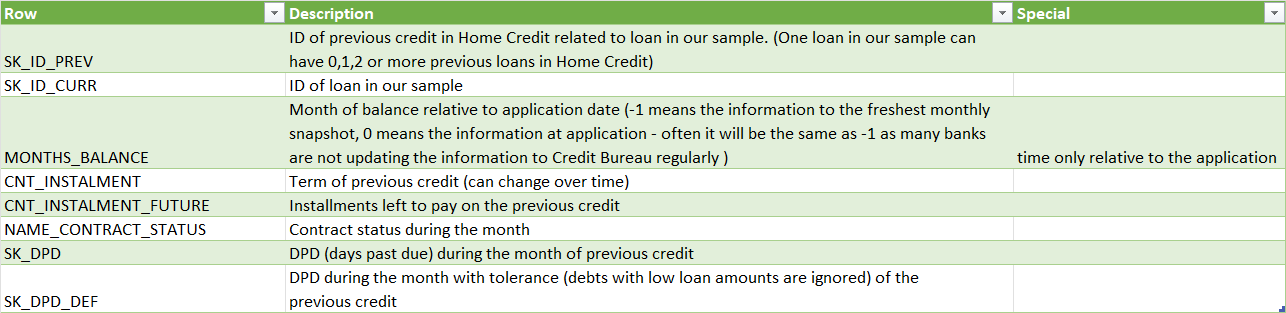

In [23]:
POS_CASH_balance = pd.read_csv('data/POS_CASH_balance.csv')
POS_CASH_balance.sample(20, random_state=1234)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
2224569,1365479,310795,-34,36.0,33.0,Active,0,0
6042196,2641828,436754,-59,6.0,0.0,Completed,0,0
8368498,1295281,303026,-26,24.0,18.0,Active,0,0
1065073,2563236,340201,-20,12.0,11.0,Active,0,0
6267972,2257690,410302,-67,6.0,2.0,Active,0,0
1961116,1467628,374456,-7,12.0,11.0,Active,0,0
6800373,1846284,216034,-31,12.0,6.0,Active,0,0
4989218,1539784,133235,-80,12.0,8.0,Active,0,0
1570620,1205535,160461,-37,16.0,2.0,Active,0,0
9587034,2355075,266086,-67,12.0,0.0,Active,235,0


#### Information

In [24]:
POS_CASH_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


#### Null Values

In [25]:
POS_CASH_balance.isnull().sum()/POS_CASH_balance.shape[0]

SK_ID_PREV               0.000000
SK_ID_CURR               0.000000
MONTHS_BALANCE           0.000000
CNT_INSTALMENT           0.002607
CNT_INSTALMENT_FUTURE    0.002608
NAME_CONTRACT_STATUS     0.000000
SK_DPD                   0.000000
SK_DPD_DEF               0.000000
dtype: float64

### Dataframe: 'previous_application'

In [26]:
previous_application = pd.read_csv('data/previous_application.csv')
previous_application.sample(20, random_state=1234)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1098789,2090681,453918,Consumer loans,11344.005,144846.0,167791.5,0.0,144846.0,FRIDAY,15,...,Consumer electronics,24.0,middle,POS household with interest,365243.0,-96.0,594.0,365243.0,365243.0,1.0
1384217,2085752,248420,Cash loans,20806.245,558000.0,558000.0,0.0,558000.0,TUESDAY,15,...,XNA,36.0,low_action,Cash Street: low,365243.0,-1288.0,-238.0,-478.0,-447.0,0.0
972289,2331131,418760,Consumer loans,12249.405,129213.0,129213.0,0.0,129213.0,SUNDAY,9,...,Consumer electronics,18.0,high,POS household with interest,365243.0,-1455.0,-945.0,-945.0,-939.0,0.0
1288532,1355726,258745,Consumer loans,22719.780,115596.0,121698.0,0.0,115596.0,SATURDAY,13,...,Consumer electronics,6.0,middle,POS household with interest,365243.0,-389.0,-239.0,-239.0,-236.0,1.0
1439287,2842461,373611,Consumer loans,12664.215,117000.0,113989.5,11700.0,117000.0,SATURDAY,16,...,Construction,10.0,low_normal,POS household with interest,365243.0,-1454.0,-1184.0,-1214.0,-1206.0,0.0
1478,1095773,439888,Consumer loans,6308.640,71523.0,53874.0,22500.0,71523.0,FRIDAY,9,...,Consumer electronics,12.0,high,POS household with interest,NaN,NaN,NaN,NaN,NaN,NaN
677573,1402572,387022,Revolving loans,NaN,0.0,0.0,NaN,NaN,THURSDAY,12,...,XNA,NaN,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
1503914,2742840,201920,Cash loans,35060.445,540000.0,625536.0,NaN,540000.0,MONDAY,13,...,Connectivity,24.0,low_normal,Cash X-Sell: low,NaN,NaN,NaN,NaN,NaN,NaN
220861,2543824,322098,Cash loans,66978.765,1350000.0,1685533.5,NaN,1350000.0,MONDAY,10,...,XNA,36.0,low_normal,Cash X-Sell: low,NaN,NaN,NaN,NaN,NaN,NaN
568539,1380310,258120,Consumer loans,NaN,103545.0,103545.0,0.0,103545.0,SUNDAY,13,...,Consumer electronics,NaN,XNA,POS household with interest,NaN,NaN,NaN,NaN,NaN,NaN


#### Information

In [27]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

#### Null Values

In [28]:
previous_application.isnull().sum().sort_values(ascending=False)/previous_application.shape[0]

RATE_INTEREST_PRIVILEGED       9.964370e-01
RATE_INTEREST_PRIMARY          9.964370e-01
AMT_DOWN_PAYMENT               5.363648e-01
RATE_DOWN_PAYMENT              5.363648e-01
NAME_TYPE_SUITE                4.911975e-01
NFLAG_INSURED_ON_APPROVAL      4.029813e-01
DAYS_TERMINATION               4.029813e-01
DAYS_LAST_DUE                  4.029813e-01
DAYS_LAST_DUE_1ST_VERSION      4.029813e-01
DAYS_FIRST_DUE                 4.029813e-01
DAYS_FIRST_DRAWING             4.029813e-01
AMT_GOODS_PRICE                2.308177e-01
AMT_ANNUITY                    2.228667e-01
CNT_PAYMENT                    2.228637e-01
PRODUCT_COMBINATION            2.071591e-04
AMT_CREDIT                     5.987257e-07
NAME_YIELD_GROUP               0.000000e+00
NAME_PORTFOLIO                 0.000000e+00
NAME_SELLER_INDUSTRY           0.000000e+00
SELLERPLACE_AREA               0.000000e+00
CHANNEL_TYPE                   0.000000e+00
NAME_PRODUCT_TYPE              0.000000e+00
SK_ID_PREV                     0

### Dataframe: 'sample_submission'

In [29]:
sample_submission = pd.read_csv('data/sample_submission.csv')
sample_submission.sample(20, random_state=1234)

,SK_ID_CURR,TARGET
4171,129790,0.5
36811,369424,0.5
19064,238492,0.5
19892,244460,0.5
20634,249677,0.5
5288,138652,0.5
28458,307699,0.5
20325,247607,0.5
507,103541,0.5
5161,137595,0.5


#### Information

In [30]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SK_ID_CURR  48744 non-null  int64  
 1   TARGET      48744 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 761.8 KB


## Data cleaning

In [31]:
del application_test
del bureau_balance
del bureau
del credit_card_balance
del installments_payments
del POS_CASH_balance
del previous_application
del sample_submission

In [32]:
missing_values = my_functions.missing_values_table(application_train)
missing_values.head(37)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [33]:
missing_values.tail(32)

,Missing Values,% of Total Values
ENTRANCES_AVG,154828,50.3
ENTRANCES_MEDI,154828,50.3
LIVINGAREA_MEDI,154350,50.2
LIVINGAREA_MODE,154350,50.2
LIVINGAREA_AVG,154350,50.2
HOUSETYPE_MODE,154297,50.2
FLOORSMAX_MEDI,153020,49.8
FLOORSMAX_AVG,153020,49.8
FLOORSMAX_MODE,153020,49.8
YEARS_BEGINEXPLUATATION_AVG,150007,48.8


### Replace and fill

In [34]:
# Replace Nulls in OWN_CAR_AGE for 0. Assuming that does who didn't answer do not have a car.
application_train['OWN_CAR_AGE'].fillna(0, inplace=True)

array([[<Axes: title={'center': 'EXT_SOURCE_1'}>,
        <Axes: title={'center': 'EXT_SOURCE_2'}>],
       [<Axes: title={'center': 'EXT_SOURCE_3'}>, <Axes: >]], dtype=object)

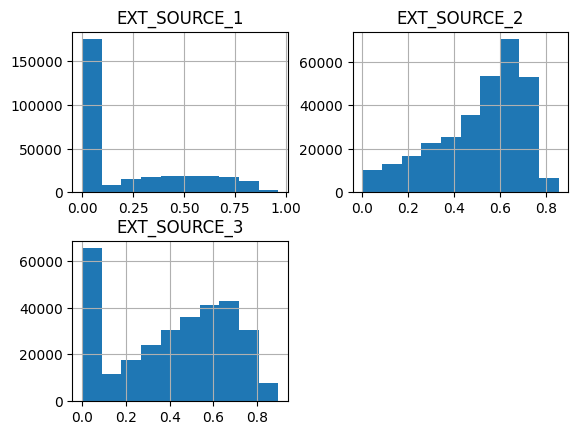

In [35]:
# Replace Nulls in EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3 for 0. Assuming that they dont have a credit score from that source.
# Then we will take into a count the mean of the 3 sources.
application_train['EXT_SOURCE_1'].fillna(0, inplace=True)
application_train['EXT_SOURCE_2'].fillna(0, inplace=True)
application_train['EXT_SOURCE_3'].fillna(0, inplace=True)
application_train[['EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3']].hist()

In [36]:
# replace NaN values in OCCUPATION_TYPE column with 'Unemployed'
application_train.loc[(application_train['DAYS_EMPLOYED'] == 365243) & (application_train['OCCUPATION_TYPE'].isnull()), 'OCCUPATION_TYPE'] = 'Unemployed'

In [37]:
application_train[['OCCUPATION_TYPE','DAYS_EMPLOYED','ORGANIZATION_TYPE']].sample(20)

,OCCUPATION_TYPE,DAYS_EMPLOYED,ORGANIZATION_TYPE
151928,Drivers,-3874,Industry: type 5
54638,High skill tech staff,-126,Industry: type 4
83914,Managers,-2234,Business Entity Type 2
93457,Managers,-1759,Business Entity Type 3
89302,NaN,-1646,Kindergarten
59705,Laborers,-2570,Self-employed
164080,Laborers,-1101,Business Entity Type 3
92376,Unemployed,365243,XNA
147075,Sales staff,-331,Self-employed
169414,Accountants,-2618,Self-employed


In [38]:
mode_by_occupation = application_train.groupby('ORGANIZATION_TYPE')['OCCUPATION_TYPE'].apply(lambda x: x.mode().iloc[0])
mode_by_occupation

ORGANIZATION_TYPE
Advertising                          Core staff
Agriculture                            Laborers
Bank                                 Core staff
Business Entity Type 1                 Laborers
Business Entity Type 2                 Laborers
Business Entity Type 3                 Laborers
Cleaning                         Cleaning staff
Construction                           Laborers
Culture                              Core staff
Electricity                            Laborers
Emergency                            Core staff
Government                           Core staff
Hotel                                Core staff
Housing                                Laborers
Industry: type 1                       Laborers
Industry: type 10                      Laborers
Industry: type 11                      Laborers
Industry: type 12         High skill tech staff
Industry: type 13                      Laborers
Industry: type 2                       Laborers
Industry: type 3      

In [39]:
# fill missing values in OCCUPATION_TYPE with corresponding mode
application_train['OCCUPATION_TYPE'] = application_train.groupby('ORGANIZATION_TYPE')['OCCUPATION_TYPE'].transform(lambda x: x.fillna(mode_by_occupation[x.name]))

<Axes: >

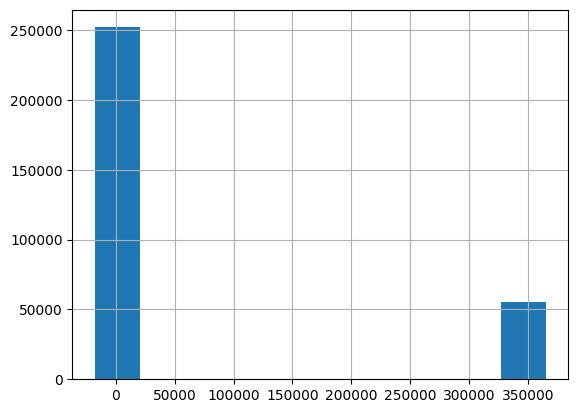

In [40]:
application_train['DAYS_EMPLOYED'].hist()

<Axes: >

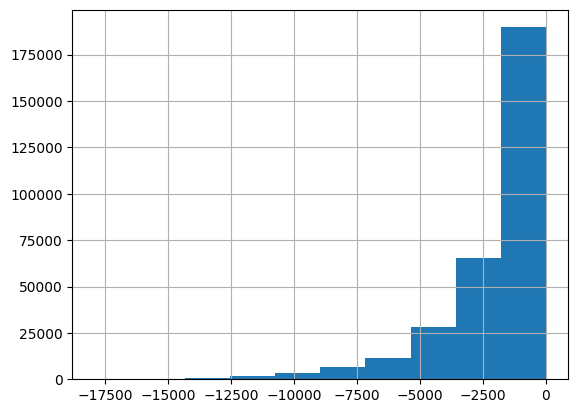

In [41]:
application_train['DAYS_EMPLOYED'] = application_train['DAYS_EMPLOYED'].replace(365243, 0)
application_train['DAYS_EMPLOYED'].hist()

In [42]:
application_train[['AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_YEAR']].sample(20)

,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_YEAR
215779,0.0,0.0,0.0,1.0,0.0,0.0
108518,0.0,0.0,1.0,1.0,0.0,2.0
220251,0.0,0.0,0.0,0.0,1.0,1.0
252277,0.0,0.0,0.0,0.0,0.0,4.0
190005,0.0,0.0,0.0,0.0,0.0,1.0
234440,0.0,0.0,0.0,0.0,0.0,2.0
272239,0.0,0.0,0.0,0.0,0.0,2.0
226676,0.0,0.0,0.0,0.0,0.0,0.0
140705,NaN,NaN,NaN,NaN,NaN,NaN
169895,1.0,0.0,0.0,0.0,0.0,6.0


array([[<Axes: title={'center': 'AMT_REQ_CREDIT_BUREAU_WEEK'}>,
        <Axes: title={'center': 'AMT_REQ_CREDIT_BUREAU_DAY'}>],
       [<Axes: title={'center': 'AMT_REQ_CREDIT_BUREAU_MON'}>,
        <Axes: title={'center': 'AMT_REQ_CREDIT_BUREAU_QRT'}>],
       [<Axes: title={'center': 'AMT_REQ_CREDIT_BUREAU_HOUR'}>,
        <Axes: title={'center': 'AMT_REQ_CREDIT_BUREAU_YEAR'}>]],
      dtype=object)

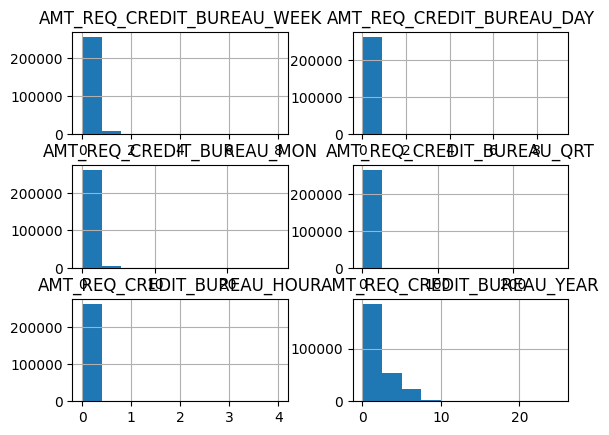

In [43]:
application_train[['AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_YEAR']].hist()

In [44]:
# fill missing values in AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_MON',
#'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_YEAR' with corresponding 0.

application_train[['AMT_REQ_CREDIT_BUREAU_WEEK',
                   'AMT_REQ_CREDIT_BUREAU_DAY',
                   'AMT_REQ_CREDIT_BUREAU_MON',
                   'AMT_REQ_CREDIT_BUREAU_QRT',
                   'AMT_REQ_CREDIT_BUREAU_HOUR',
                   'AMT_REQ_CREDIT_BUREAU_YEAR']] = application_train[['AMT_REQ_CREDIT_BUREAU_WEEK',
                                                                       'AMT_REQ_CREDIT_BUREAU_DAY',
                                                                       'AMT_REQ_CREDIT_BUREAU_MON',
                                                                       'AMT_REQ_CREDIT_BUREAU_QRT',
                                                                       'AMT_REQ_CREDIT_BUREAU_HOUR',
                                                                       'AMT_REQ_CREDIT_BUREAU_YEAR']].fillna(0)

In [45]:
application_train['NAME_TYPE_SUITE'] = application_train['NAME_TYPE_SUITE'].fillna(application_train['NAME_TYPE_SUITE'].mode().values[0])

In [46]:
application_train[['DEF_30_CNT_SOCIAL_CIRCLE',
                   'OBS_60_CNT_SOCIAL_CIRCLE',
                   'DEF_60_CNT_SOCIAL_CIRCLE',
                   'OBS_30_CNT_SOCIAL_CIRCLE']] = application_train[['DEF_30_CNT_SOCIAL_CIRCLE',
                                                                      'OBS_60_CNT_SOCIAL_CIRCLE',
                                                                      'DEF_60_CNT_SOCIAL_CIRCLE',
                                                                      'OBS_30_CNT_SOCIAL_CIRCLE']].fillna(0)

In [47]:
application_train.loc[application_train['AMT_GOODS_PRICE'].isnull()][['AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE']]

,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
724,135000.0,6750.0,NaN
5937,450000.0,22500.0,NaN
6425,202500.0,10125.0,NaN
6703,180000.0,9000.0,NaN
7647,450000.0,22500.0,NaN
...,...,...,...
304678,202500.0,10125.0,NaN
304784,270000.0,13500.0,NaN
305833,270000.0,13500.0,NaN
306126,270000.0,13500.0,NaN


array([[<Axes: title={'center': '0'}>]], dtype=object)

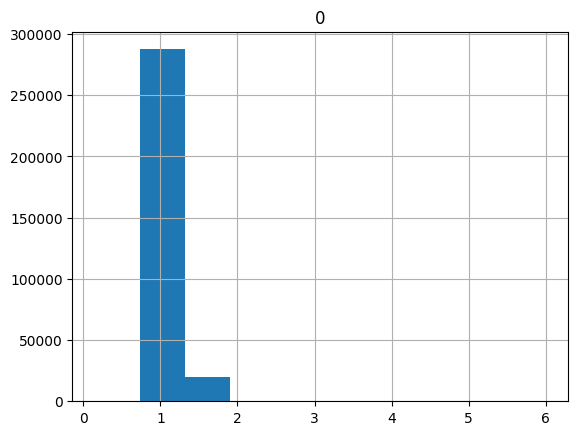

In [48]:
(application_train['AMT_CREDIT']/application_train['AMT_GOODS_PRICE']).to_frame().hist()

In [49]:
application_train['AMT_GOODS_PRICE'].fillna(application_train['AMT_CREDIT'], inplace=True)

array([[<Axes: title={'center': 'AMT_ANNUITY'}>,
        <Axes: title={'center': 'CNT_FAM_MEMBERS'}>],
       [<Axes: title={'center': 'DAYS_LAST_PHONE_CHANGE'}>, <Axes: >]],
      dtype=object)

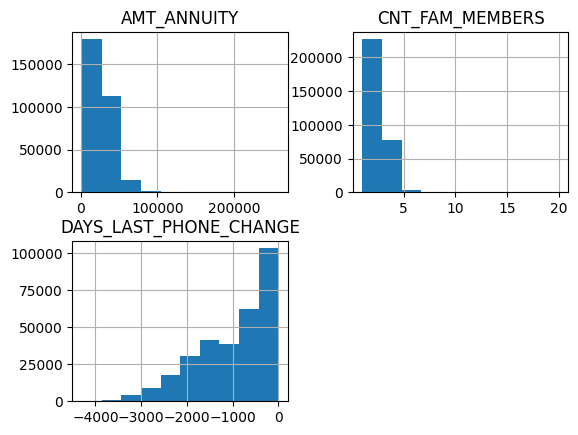

In [50]:
application_train[['AMT_ANNUITY', 'CNT_FAM_MEMBERS','DAYS_LAST_PHONE_CHANGE']].hist()

In [51]:
application_train[['AMT_ANNUITY',
                   'CNT_FAM_MEMBERS',
                   'DAYS_LAST_PHONE_CHANGE']] = application_train[['AMT_ANNUITY',
                                                                   'CNT_FAM_MEMBERS',
                                                                   'DAYS_LAST_PHONE_CHANGE']].fillna(0)

In [52]:
my_functions.missing_values_table(application_train)

Your selected dataframe has 122 columns.
There are 47 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


### Delete

I decided to delete features with more than 45% null values.

In [53]:
clean_app_train = my_functions.drop_features(application_train, 0.45)
my_functions.missing_values_table(clean_app_train)
del application_train

Your selected dataframe has 75 columns.
There are 0 columns that have missing values.


In [54]:
clean_app_train.sample(20, random_state=1234)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307156,455858,0,Cash loans,F,Y,N,0,121500.0,900000.0,29034.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
145177,268345,0,Cash loans,F,N,Y,1,90000.0,545040.0,25537.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
282054,426693,0,Cash loans,F,N,N,0,112500.0,225000.0,15034.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
105081,221937,0,Cash loans,F,N,N,1,45000.0,544491.0,17563.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
282000,426636,0,Cash loans,M,N,N,1,157500.0,398160.0,10633.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
57368,166483,0,Cash loans,F,N,Y,0,112500.0,253737.0,26127.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
65069,175460,0,Cash loans,M,Y,Y,0,378000.0,622413.0,33894.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
277250,421273,0,Cash loans,F,N,Y,0,93919.5,225000.0,20821.5,...,1,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
182069,311031,0,Cash loans,M,Y,Y,0,247500.0,253737.0,26775.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
301531,449330,1,Cash loans,M,Y,Y,0,67500.0,152820.0,11205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Understanding

We now need to understand each of the features in the train data in order to make a good exploratory analysis and after that make feature engineering with domain knowledge. For this, we will list the columns (features) one by one to give a brief explanation of what it means 

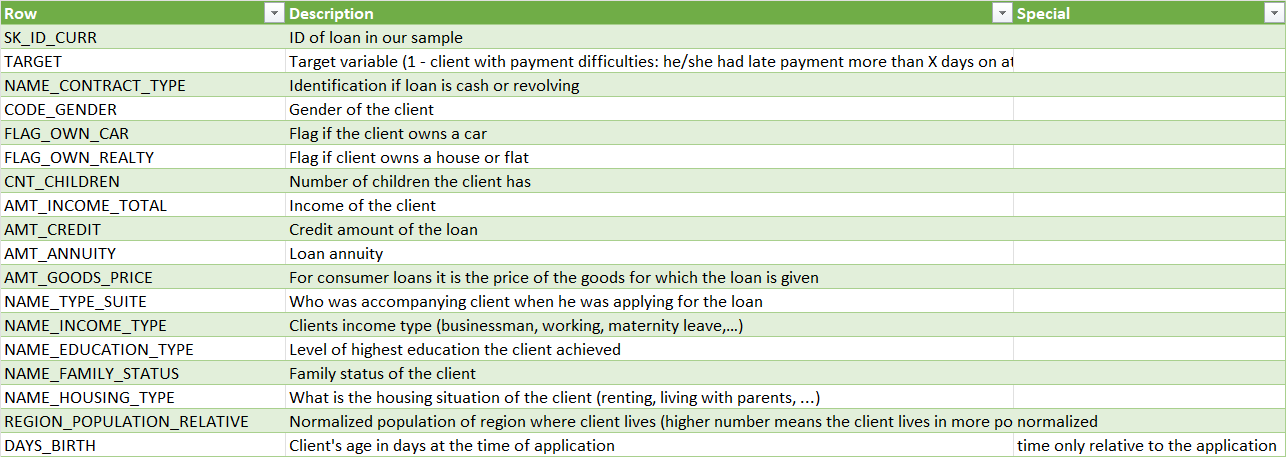

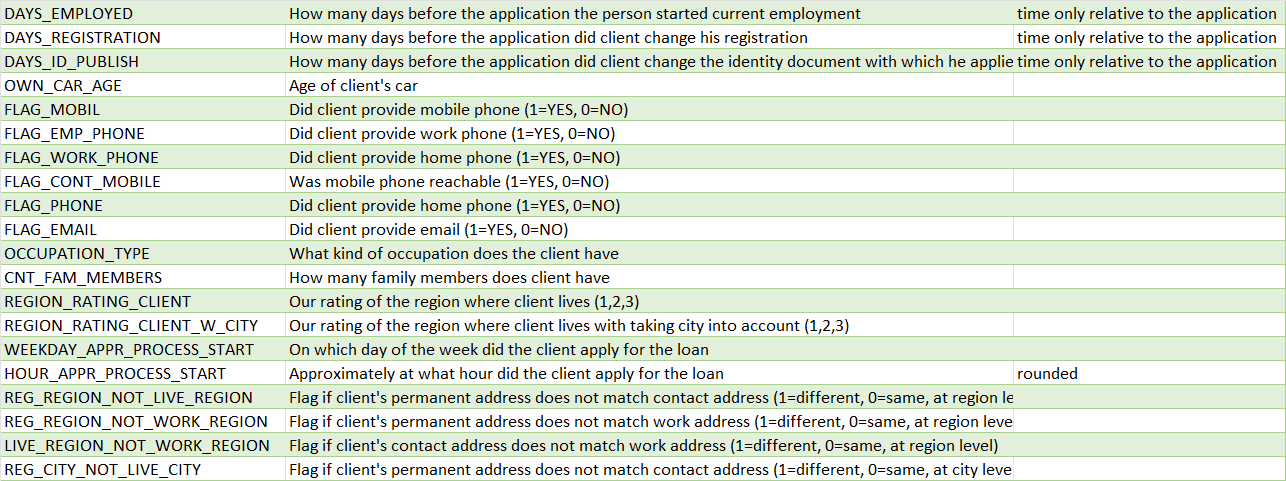

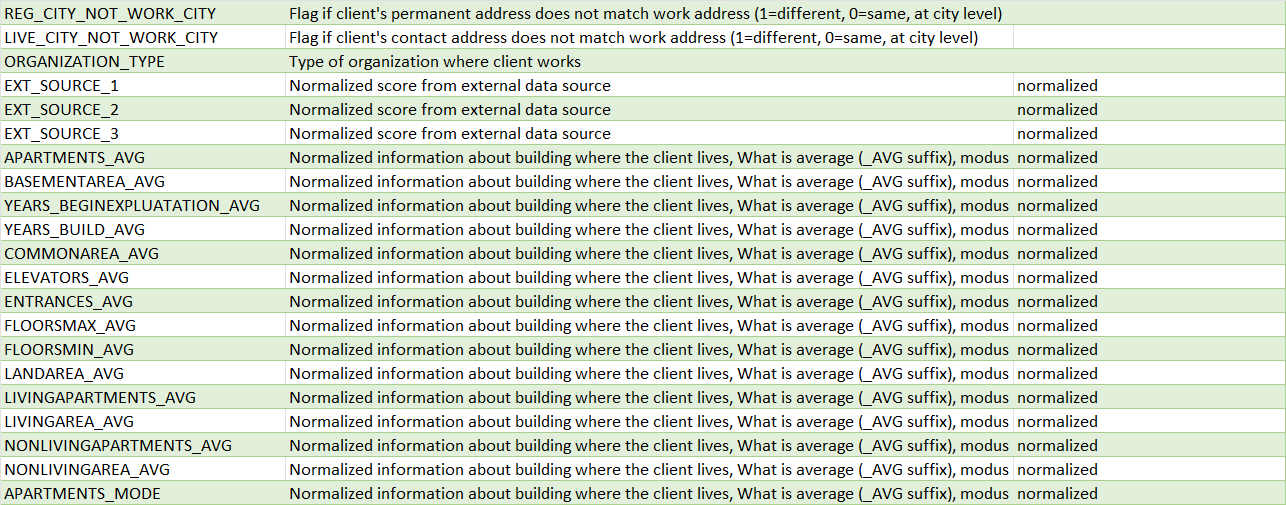

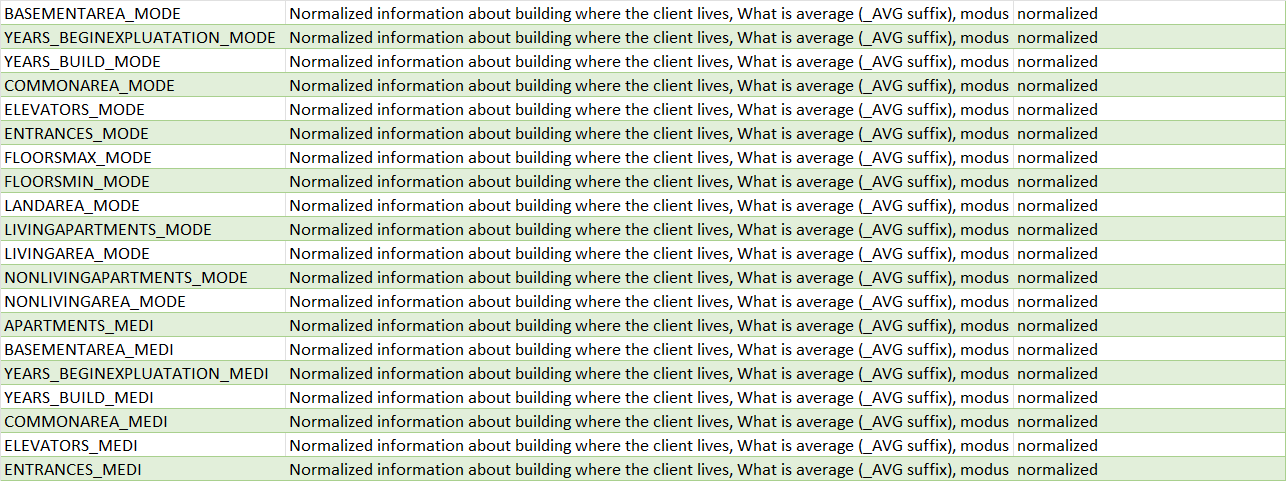

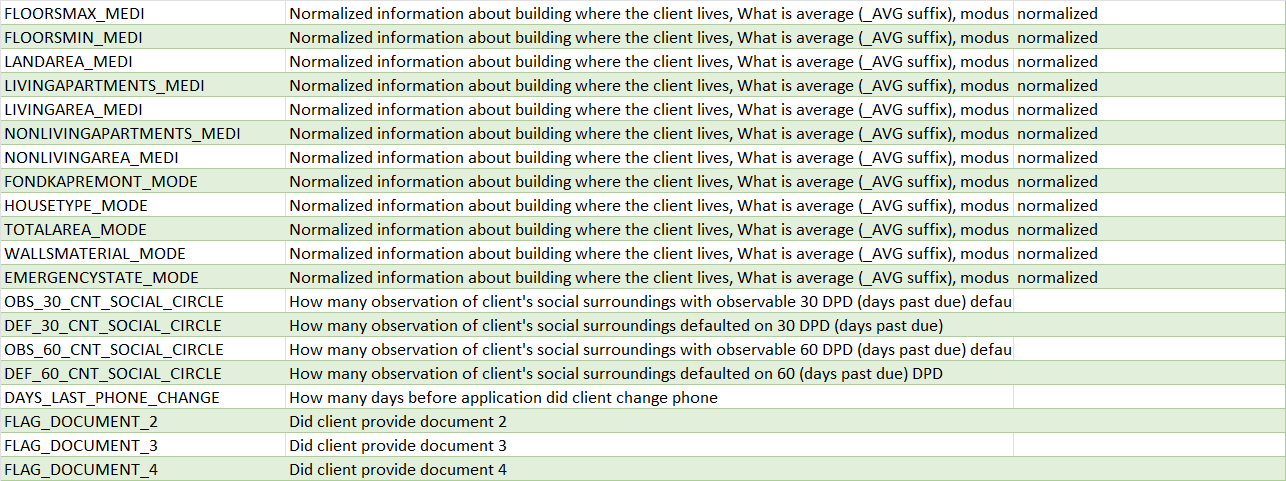

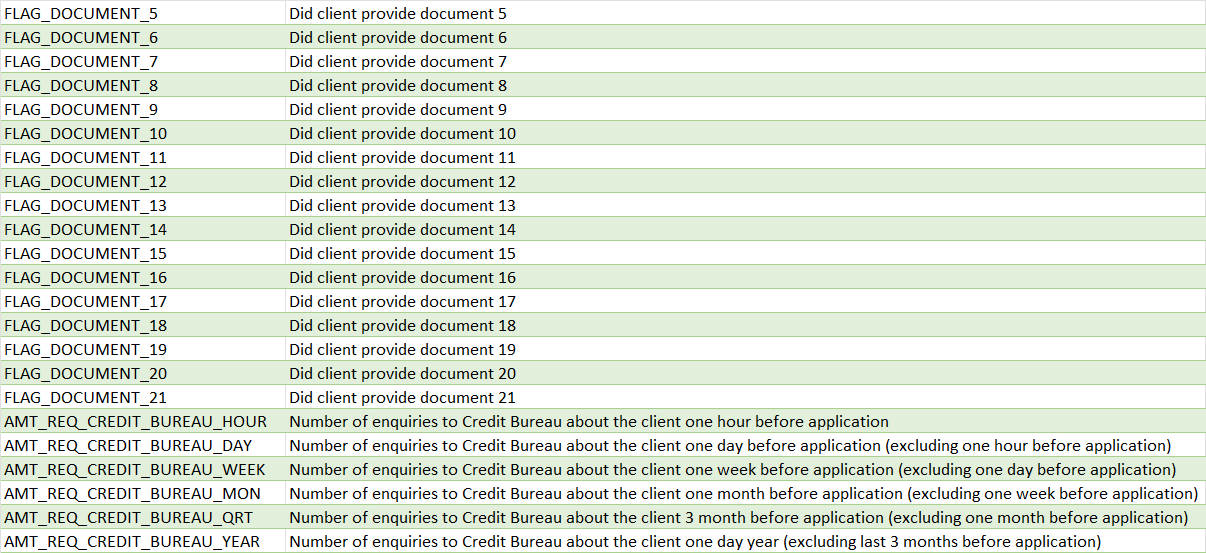

In [55]:
clean_app_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_3

## Exploratory Data Analysis

### Boxplots

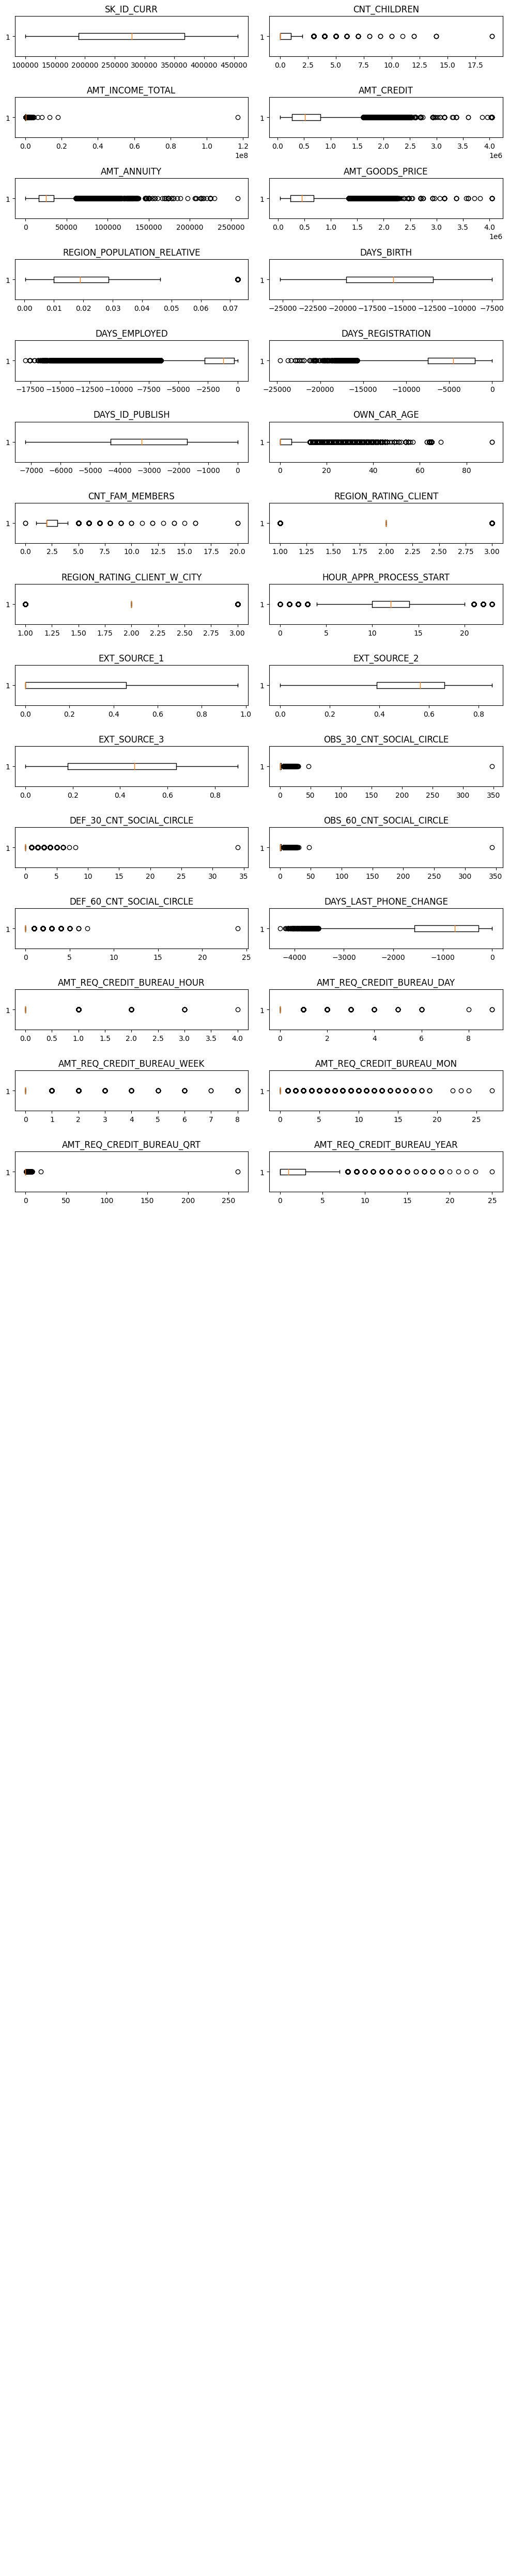

In [56]:
# Crear una figura y subplots

num_cols = clean_app_train.select_dtypes(include=['float64', 'int64'])

n_cols_subplot = 2
n_rows_subplot = (int)(np.round(num_cols.shape[1]/n_cols_subplot, 0))

fig, axs = plt.subplots(nrows=n_rows_subplot, ncols=n_cols_subplot, figsize=(10, 50))

# Excluir las columnas de valor binario
cols_to_exclude = clean_app_train.loc[:, (clean_app_train.max() == 1) & (clean_app_train.min() == 0)].columns
df_filtered = clean_app_train.drop(cols_to_exclude, axis=1)

# Hacer un loop sobre cada columna con datos numéricos
numeric_cols = df_filtered.select_dtypes(include=['float64', 'int64']).columns
for i, col in enumerate(numeric_cols):
    
    # Hacer el boxplot en la posición correspondiente
    ax = axs[i//n_cols_subplot, i%n_cols_subplot]
    ax.boxplot(df_filtered[col].dropna(), vert=False)
    ax.set_title(col)

# Eliminar subplots vacíos
for j in range(i+1, n_cols_subplot*n_rows_subplot):
    axs[j//n_cols_subplot, j%n_cols_subplot].axis('off')

plt.tight_layout()
plt.show()

### Histograms (numeric only)

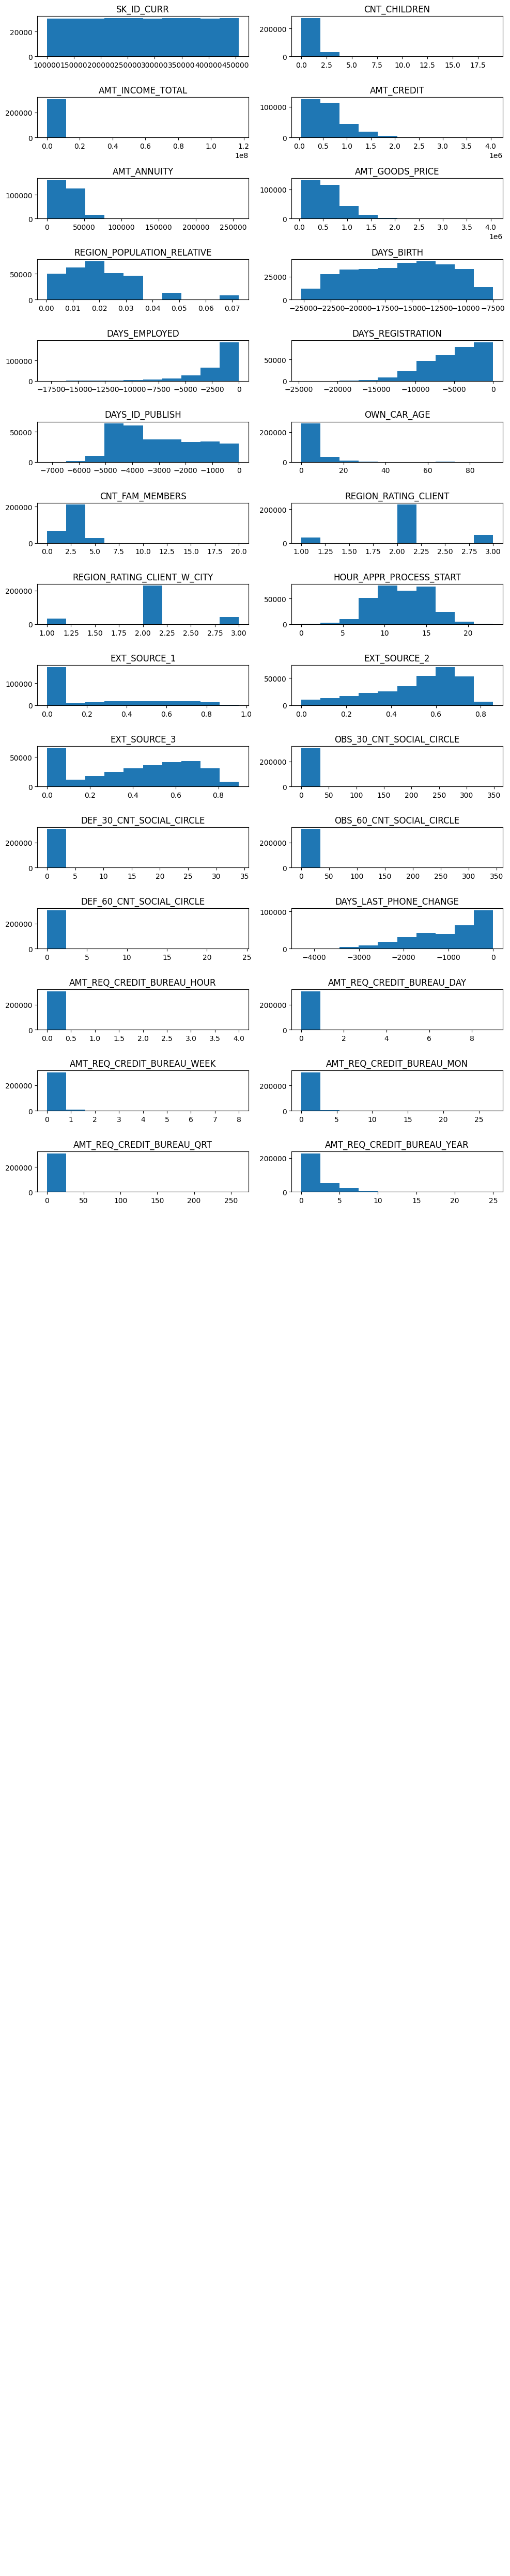

In [57]:
fig, axs = plt.subplots(nrows=n_rows_subplot, ncols=n_cols_subplot, figsize=(10, 50))

numeric_cols = df_filtered.select_dtypes(include=['float64', 'int64']).columns
for i, col in enumerate(numeric_cols):
    
    # Hacer el boxplot en la posición correspondiente
    ax = axs[i//n_cols_subplot, i%n_cols_subplot]
    ax.hist(df_filtered[col].dropna())
    ax.set_title(col)

# Eliminar subplots vacíos
for j in range(i+1, n_cols_subplot*n_rows_subplot):
    axs[j//n_cols_subplot, j%n_cols_subplot].axis('off')

plt.tight_layout()
plt.show()

### Histograms (categorical only)

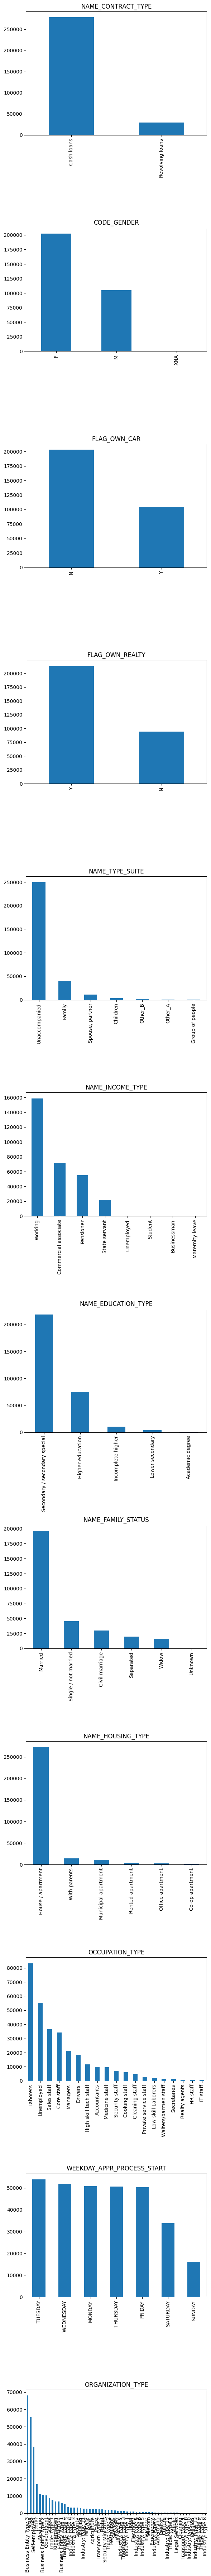

In [58]:
# Get a list of categorical columns
cat_cols = list(clean_app_train.select_dtypes(include=['object']).columns)

# Plot histograms for categorical columns
fig, axs = plt.subplots(nrows=len(cat_cols), figsize=(6, 6*len(cat_cols)))
for col, ax in zip(cat_cols, axs):
    clean_app_train[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

### Statistic Description

In [59]:
clean_app_train.iloc[:,:30].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27107.516051,5.381623e+05,0.020868,-16036.995067,-1954.848123,-4986.120328,-2994.202373,4.101879,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152651
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14494.443757,3.694053e+05,0.013831,4363.988632,2307.068896,3522.886321,1509.450419,9.009514,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910695
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,0.000000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,5.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,0.000000,0.000000,0.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000


In [60]:
(clean_app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [61]:
(clean_app_train['DAYS_EMPLOYED'] / -365).describe()

count    307511.000000
mean          5.355748
std           6.320737
min          -0.000000
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

In [62]:
(clean_app_train['DAYS_REGISTRATION'] / -365).describe()

count    307511.000000
mean         13.660604
std           9.651743
min          -0.000000
25%           5.506849
50%          12.339726
75%          20.491781
max          67.594521
Name: DAYS_REGISTRATION, dtype: float64

In [63]:
(clean_app_train['DAYS_ID_PUBLISH'] / -365).describe()

count    307511.000000
mean          8.203294
std           4.135481
min          -0.000000
25%           4.712329
50%           8.915068
75%          11.778082
max          19.717808
Name: DAYS_ID_PUBLISH, dtype: float64

- SK_ID_CURR, TARGET FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE,	FLAG_EMAIL will not be analyze.

- **CNT_CHILDREN:** In the boxplot we can consider that more than 2 kids (3+) is consider an outlier. Also, in the histogram we observe that most of the clients 0 children. The median of this feature is 0 and the maximum number of children is 19.
    > We can try to group the values in 1, 2, 3+ children and see if there is a trend.

- **AMT_INCOME_TOTAL:** There is one big outlier in the max value 1.17e+08, the median is 1.47e+05.
    > **IS NECESSARY TO DELETE THE OUTLIER.**

- **AMT_CREDIT:** There are many outliers, the distribution have a long tail to the right.
    > We can consider to delete the outliers, but maybe is not a good idea.

- **AMT_ANNUITY, AMT_GOODS_PRICE:** Data is very similar to the above.

- **REGION_POPULATION_RELATIVE:** There is one outlier in the maximum value 0.072508.
    > **IS NECESSARY TO DELETE THE OUTLIER.**

- **DAYS_BIRTH:** The mean age is 43, min value 20 and max value 69, it seems to be no problem with this feature.
    > We will consider to group by 5 years in order to see if there is a trend by age group

- **DAYS_EMPLOYED:** Seems not to be a problem in this feature. Max days employed is 49 years which seems good.
    > We will consider to group by 5 years in order to see if there is a trend by group.

- **DAYS_REGISTRATION:** Seems not to be a problem in this feature. Max days before the application the client change his registration is 67 years which seems ok.
    > We will consider to group by 5 years in order to see if there is a trend by group.

- **DAYS_ID_PUBLISH:** Seems not to be a problem in this feature. Max days before the application the client change ID is 19 years which seems ok.
    > We will consider to group by 5 years in order to see if there is a trend by group.

- **OWN_CAR_AGE:** There are many outliers, the distribution have a long tail to the right.
    > We can consider to group the data and see if there is a trend.

- **CNT_FAM_MEMBERS:** There are some outliers, the distribution have a long tail to the right but is not heavy.
    > We can consider to group the data and see if there is a trend.

In [64]:
clean_app_train.iloc[:,30:50].describe()

,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.219024,0.513289,0.409575,1.417523,0.142944,1.400626,0.099717,-962.855657,0.000042
std,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.285374,0.192334,0.268177,2.398395,0.446033,2.377224,0.361735,826.808966,0.006502
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000
25%,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.390782,0.178760,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000
50%,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.565467,0.459690,0.000000,0.000000,0.000000,0.000000,-757.000000,0.000000
75%,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.456261,0.663422,0.636376,2.000000,0.000000,2.000000,0.000000,-274.000000,0.000000
max,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.962693,0.855000,0.896010,348.000000,34.000000,344.000000,24.000000,0.000000,1.000000


In [65]:
(clean_app_train['DAYS_LAST_PHONE_CHANGE'] / -365).describe()

count    307511.000000
mean          2.637961
std           2.265230
min          -0.000000
25%           0.750685
50%           2.073973
75%           4.301370
max          11.758904
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

- REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION,	LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, FLAG_DOCUMENT_2 will not be analyze.

- **REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY:** This to are almost the same, values are only 1, 2 and 3.
    > We will consider to delete one of them.

- **HOUR_APPR_PROCESS_START:** Not many things to say about this feature, some kind of normal distribution.

- **EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3:** There are many problems with null values so we create one unique EXT_SOURCE in the feature engineering section.

- **OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE:** There are important outliers, maximum values in OBS are very extreme.
    > We will try to group and see if there is a relation with the target.

- **DAYS_LAST_PHONE_CHANGE:** Seems not to be a problem in this feature. Max days after last phone change is 11 years which seems ok.
    > We will consider to group by year in order to see if there is a trend by group.

In [66]:
clean_app_train.iloc[:,50:60].describe()

,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007
std,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
clean_app_train.iloc[:,60:].describe()

,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.229631,1.643447
std,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.078014,0.103037,0.190728,0.856810,0.744059,1.855821
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [68]:
clean_app_train.describe(include='object')

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
count,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511
unique,2,3,2,2,7,8,5,6,6,19,7,58
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3
freq,278232,202448,202924,213312,249818,158774,218391,196432,272868,83325,53901,67992


## Feature Engineering

In [69]:
clean_app_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_3

In [70]:
for column in clean_app_train.columns:
    my_functions.print_unique_values(clean_app_train, column)

Unique values for NAME_CONTRACT_TYPE: ['Cash loans' 'Revolving loans']

Unique values for CODE_GENDER: ['M' 'F' 'XNA']

Unique values for FLAG_OWN_CAR: ['N' 'Y']

Unique values for FLAG_OWN_REALTY: ['Y' 'N']

Unique values for NAME_TYPE_SUITE: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']

Unique values for NAME_INCOME_TYPE: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']

Unique values for NAME_EDUCATION_TYPE: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

Unique values for NAME_FAMILY_STATUS: ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']

Unique values for NAME_HOUSING_TYPE: ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']

Unique values for OCCUPATION_TYPE: ['Laborers' 'Core staff' 'Accountants' 'Man

### New features based on information in other features

<Axes: >

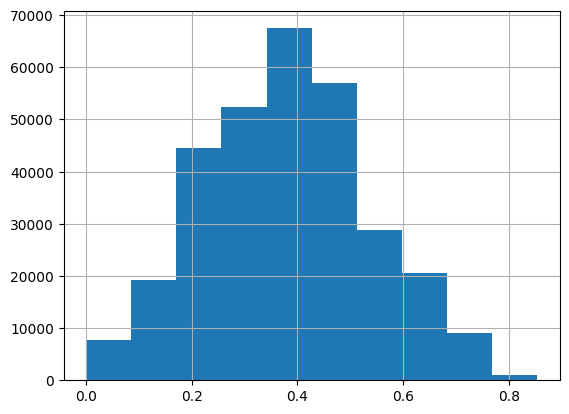

In [71]:
clean_app_train['EXT_SOURCE_FINAL'] = clean_app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3']].mean(axis=1)
clean_app_train['EXT_SOURCE_FINAL'].hist()

In [72]:
clean_app_train.drop(['EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3'], axis=1, inplace=True)

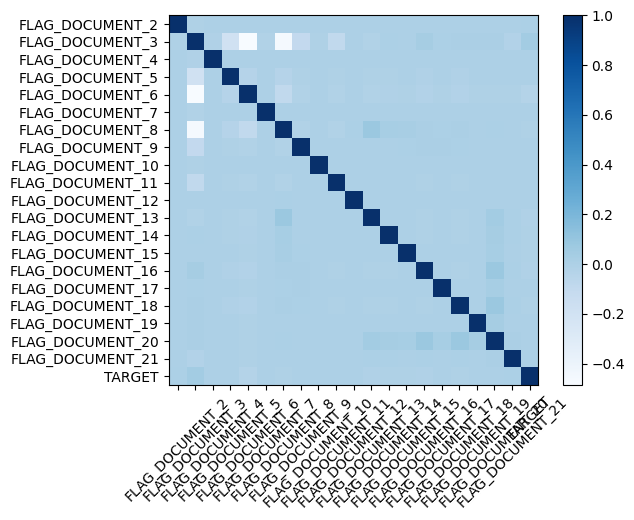

In [73]:
# Select the columns of interest
flag_cols = [col for col in clean_app_train.columns if 'FLAG_DOCUMENT' in col]

cols_of_interest = flag_cols + ['TARGET']

# Create a subset of the data with the columns of interest
subset = clean_app_train[cols_of_interest]

# Calculate the correlation matrix
corr_matrix = subset.corr()

# Create a heatmap
plt.imshow(corr_matrix, cmap='Blues')
plt.colorbar()

# Add labels and ticks to the heatmap
tick_marks = [i for i in range(len(cols_of_interest))]
plt.xticks(tick_marks, cols_of_interest, rotation=45)
plt.yticks(tick_marks, cols_of_interest)

# Display the plot
plt.show()


In [74]:
clean_app_train[flag_cols]

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
307507,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307508,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307509,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<Axes: >

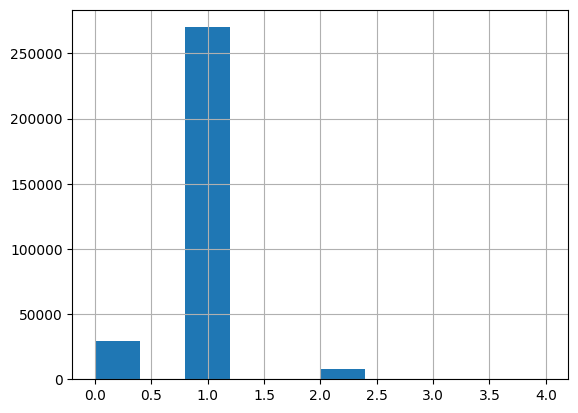

In [75]:
clean_app_train['FLAG_DOCUMENT_SUM'] = clean_app_train[flag_cols].sum(axis=1)
clean_app_train['FLAG_DOCUMENT_SUM'].hist()

In [76]:
clean_app_train.drop(flag_cols, axis=1, inplace=True)

## Modelling

In [77]:
# Drop id column
model_data = clean_app_train.drop('SK_ID_CURR', axis=1)
del clean_app_train

In [78]:
model_data

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_FINAL,FLAG_DOCUMENT_SUM
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,0.161787,1
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0.311171,1
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.428493,0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,0.0,0.216814,1
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0.107579,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0.0,-273.0,0.0,0.0,0.0,0.0,0.0,0.0,0.275734,1
307507,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038664,1
307508,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0,0.499536,1
307509,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,...,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0,0.391729,1


### Encoding: One-hot

In [79]:
# Create X and y
X = model_data.drop('TARGET', axis=1)
y = model_data['TARGET']

# Columns of categorical features
cat_cols = X.select_dtypes(['object', 'category']).columns
numeric_cols = X.select_dtypes(['float64', 'int64']).columns
X_categorical = X[cat_cols]
X_numerical = X[numeric_cols]
print(X_categorical.columns)
print(X_numerical.columns)

# Create an instance of OneHotEncoder
encoder = OneHotEncoder()

# Fit the encoder to your categorical data
X_encoded = encoder.fit(X_categorical).transform(X_categorical)
column_name = encoder.get_feature_names_out(X_categorical.columns)
# Transform to a datafrae
#cat_ohe_df = pd.DataFrame(X_encoded.toarray(), columns = encoder.get_feature_names_out(X_categorical))

# Combine the one-hot encoded data with the original numerical data
X_encoded_df = pd.DataFrame.sparse.from_spmatrix(X_encoded, columns=column_name)
X = pd.concat([X_encoded_df, X_numerical], axis=1)



Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')
Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
      

In [80]:
X

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,...,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_FINAL,FLAG_DOCUMENT_SUM
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,0.161787,1
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0.311171,1
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.428493,0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,0.0,0.216814,1
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0.107579,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,-273.0,0.0,0.0,0.0,0.0,0.0,0.0,0.275734,1
307507,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038664,1
307508,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0,0.499536,1
307509,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0,0.391729,1


### Class Balance

0    0.919271
1    0.080729
Name: TARGET, dtype: float64


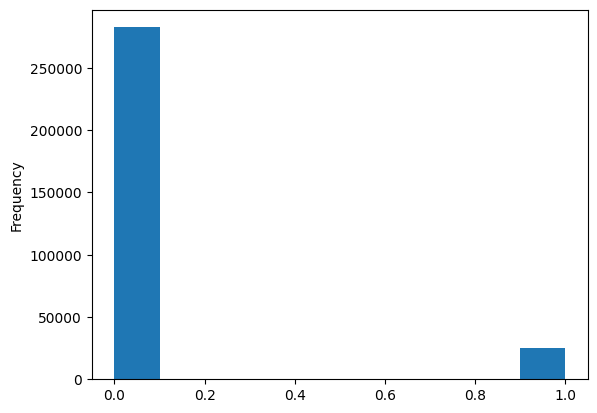

In [81]:
print(y.value_counts()/y.shape[0])
y.astype(int).plot.hist();

We can see that there is a very big problem with the balance of the information, this because there is much less information of default clients than clients that pay their loan.

In [136]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

rus = RandomUnderSampler(random_state=1234)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

/home/maurojara/coding/diplomaDataScience/homeCreditRisk/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


0    0.5
1    0.5
Name: TARGET, dtype: float64


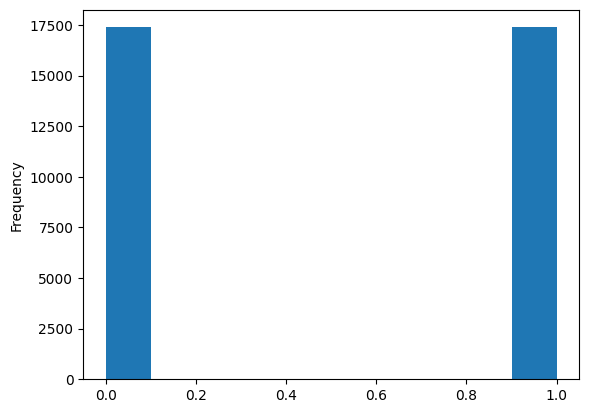

In [83]:
print(y_resampled.value_counts()/y_resampled.shape[0])
y_resampled.plot.hist();


In [84]:
len(y_resampled)

34774

### First model: Random Forest Classifier

In [85]:
# Create a Random Forest classifier object
rf_clf = RandomForestClassifier(n_estimators=100, random_state=1234)

# Fit the classifier to the training data
rf_clf.fit(X_resampled, y_resampled)

# Make predictions on the test data
y_pred = rf_clf.predict(X_test)

# Evaluate the model performance on the test set
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
# true negatives is C_{0,0}, false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}.

print('Classification Report')
print(classification_report(y_test, y_pred))

/home/maurojara/coding/diplomaDataScience/homeCreditRisk/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/maurojara/coding/diplomaDataScience/homeCreditRisk/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Confusion Matrix
[[57873 26943]
 [ 2585  4853]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.68      0.80     84816
           1       0.15      0.65      0.25      7438

    accuracy                           0.68     92254
   macro avg       0.55      0.67      0.52     92254
weighted avg       0.89      0.68      0.75     92254



In [86]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred))
conf_mat

,0,1
0,57873,26943
1,2585,4853


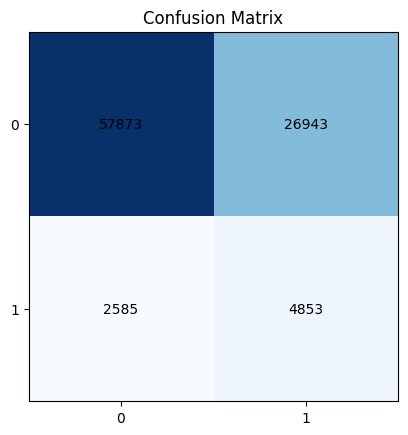

In [87]:
fig, ax = plt.subplots()
im = ax.imshow(conf_mat, cmap='Blues')

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(conf_mat)), labels=conf_mat.columns)
ax.set_yticks(np.arange(len(conf_mat)), labels=conf_mat.index)

# Add values to each cell
for i in range(len(conf_mat.index)):
    for j in range(len(conf_mat.columns)):
        text = ax.text(i, j, round(conf_mat[i][j], 1),
                       ha = "center", va = "center", color = "Black")

plt.title('Confusion Matrix')

plt.show()

#### Feature importance

In [88]:
feature_names = X.columns
importances = rf_clf.feature_importances_
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

In [89]:
importance_df.sort_values(['importance'], ascending=True).head(20)

,feature,importance
33,NAME_FAMILY_STATUS_Unknown,0.000000
136,FLAG_MOBIL,0.000000
16,NAME_INCOME_TYPE_Businessman,0.000000
4,CODE_GENDER_XNA,0.000002
18,NAME_INCOME_TYPE_Maternity leave,0.000004
92,ORGANIZATION_TYPE_Industry: type 8,0.000004
21,NAME_INCOME_TYPE_Student,0.000005
85,ORGANIZATION_TYPE_Industry: type 13,0.000011
22,NAME_INCOME_TYPE_Unemployed,0.000012
24,NAME_EDUCATION_TYPE_Academic degree,0.000014



https://www.datacamp.com/tutorial/random-forests-classifier-python

### Second Model: Gradient Boosting Machine

In [90]:
# Create a GBoost classifier object
gb_clf = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 3, n_estimators= 100 ,random_state=1234)

# Fit the classifier to the training data
gb_clf.fit(X_resampled, y_resampled)

# Make predictions on the test data
y_pred_gb = gb_clf.predict(X_test)

# Evaluate the model performance on the test set
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_gb))
# true negatives is C_{0,0}, false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}.

print('Classification Report')
print(classification_report(y_test, y_pred_gb))

/home/maurojara/coding/diplomaDataScience/homeCreditRisk/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/maurojara/coding/diplomaDataScience/homeCreditRisk/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Confusion Matrix
[[57654 27162]
 [ 2417  5021]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.68      0.80     84816
           1       0.16      0.68      0.25      7438

    accuracy                           0.68     92254
   macro avg       0.56      0.68      0.52     92254
weighted avg       0.89      0.68      0.75     92254



In [91]:
conf_mat_gb = pd.DataFrame(confusion_matrix(y_test, y_pred_gb))
conf_mat_gb

,0,1
0,57654,27162
1,2417,5021


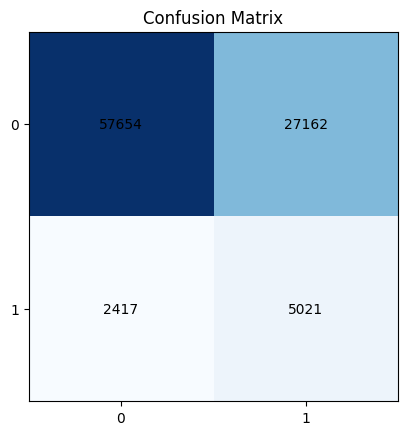

In [92]:
fig, ax = plt.subplots()
im = ax.imshow(conf_mat_gb, cmap='Blues')

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(conf_mat_gb)), labels=conf_mat_gb.columns)
ax.set_yticks(np.arange(len(conf_mat_gb)), labels=conf_mat_gb.index)

# Add values to each cell
for i in range(len(conf_mat_gb.index)):
    for j in range(len(conf_mat_gb.columns)):
        text = ax.text(i, j, round(conf_mat_gb[i][j], 1),
                       ha = "center", va = "center", color = "Black")

plt.title('Confusion Matrix')

plt.show()

#### Grid Search Hiperparameters

In [93]:
'''# Definir el rango de valores para cada hiperparámetro
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10]
}

# Crear el modelo de Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=1234)

# Realizar una búsqueda exhaustiva de los mejores hiperparámetros
grid_search = GridSearchCV(gb_clf, param_grid, cv=3, scoring='f1')
grid_search.fit(X_resampled, y_resampled)

# Obtener los mejores hiperparámetros y el mejor score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(best_params)
print(best_score)

'''


"# Definir el rango de valores para cada hiperparámetro\nparam_grid = {\n    'learning_rate': [0.01, 0.1, 1],\n    'n_estimators': [50, 100, 200],\n    'max_depth': [3, 5, 10]\n}\n\n# Crear el modelo de Gradient Boosting Classifier\ngb_clf = GradientBoostingClassifier(random_state=1234)\n\n# Realizar una búsqueda exhaustiva de los mejores hiperparámetros\ngrid_search = GridSearchCV(gb_clf, param_grid, cv=3, scoring='f1')\ngrid_search.fit(X_resampled, y_resampled)\n\n# Obtener los mejores hiperparámetros y el mejor score\nbest_params = grid_search.best_params_\nbest_score = grid_search.best_score_\n\nprint(best_params)\nprint(best_score)\n\n"

## Improving the model score

### Domain knowledge features

- CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income
- ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
- CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due
- DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age

In [94]:
X_train_new_features = X_resampled.copy()

X_train_new_features['CREDIT_INCOME_PERCENT'] = X_train_new_features['AMT_CREDIT'] / X_train_new_features['AMT_INCOME_TOTAL']
X_train_new_features['ANNUITY_INCOME_PERCENT'] = X_train_new_features['AMT_ANNUITY'] / X_train_new_features['AMT_INCOME_TOTAL']
X_train_new_features['CREDIT_TERM'] = X_train_new_features['AMT_ANNUITY'] / X_train_new_features['AMT_CREDIT']
X_train_new_features['DAYS_EMPLOYED_PERCENT'] = X_train_new_features['DAYS_EMPLOYED'] / X_train_new_features['DAYS_BIRTH']

In [95]:
X_test_new_features = X_test.copy()

X_test_new_features['CREDIT_INCOME_PERCENT'] = X_test_new_features['AMT_CREDIT'] / X_test_new_features['AMT_INCOME_TOTAL']
X_test_new_features['ANNUITY_INCOME_PERCENT'] = X_test_new_features['AMT_ANNUITY'] / X_test_new_features['AMT_INCOME_TOTAL']
X_test_new_features['CREDIT_TERM'] = X_test_new_features['AMT_ANNUITY'] / X_test_new_features['AMT_CREDIT']
X_test_new_features['DAYS_EMPLOYED_PERCENT'] = X_test_new_features['DAYS_EMPLOYED'] / X_test_new_features['DAYS_BIRTH']

In [97]:
X_train_new_features.shape

(34774, 169)

In [98]:
# Create a GBoost classifier object
gb_clf_new_features = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 3, n_estimators= 100 ,random_state=1234)

# Fit the classifier to the training data
gb_clf_new_features.fit(X_train_new_features, y_resampled)

# Make predictions on the test data
y_pred_gb = gb_clf_new_features.predict(X_test_new_features)

# Evaluate the model performance on the test set
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_gb))
# true negatives is C_{0,0}, false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}.

print('Classification Report')
print(classification_report(y_test, y_pred_gb))

/home/maurojara/coding/diplomaDataScience/homeCreditRisk/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/maurojara/coding/diplomaDataScience/homeCreditRisk/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Confusion Matrix
[[57882 26934]
 [ 2369  5069]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.68      0.80     84816
           1       0.16      0.68      0.26      7438

    accuracy                           0.68     92254
   macro avg       0.56      0.68      0.53     92254
weighted avg       0.90      0.68      0.75     92254



### Normalize features

In [99]:

# create an instance of MinMaxScaler
scaler = MinMaxScaler()

# fit and transform only non-binary features (assuming they are in a DataFrame called X)
non_binary_cols = [col for col in X_train_new_features.columns if X_train_new_features[col].nunique() > 2]
X_train_new_features_norm = X_train_new_features.copy()
X_train_new_features_norm[non_binary_cols] = scaler.fit_transform(X_train_new_features_norm[non_binary_cols])


In [100]:
# fit and transform only non-binary features (assuming they are in a DataFrame called X)
non_binary_cols = [col for col in X_test_new_features.columns if X_test_new_features[col].nunique() > 2]
X_test_new_features_norm = X_test_new_features.copy()
X_test_new_features_norm[non_binary_cols] = scaler.fit_transform(X_test_new_features_norm[non_binary_cols])

In [101]:
# Create a GBoost classifier object
gb_clf_new_features = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 3, n_estimators= 100 ,random_state=1234)

# Fit the classifier to the training data
gb_clf_new_features.fit(X_train_new_features_norm, y_resampled)

# Make predictions on the test data
y_pred_gb = gb_clf_new_features.predict(X_test_new_features_norm)

# Evaluate the model performance on the test set
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_gb))
# true negatives is C_{0,0}, false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}.

print('Classification Report')
print(classification_report(y_test, y_pred_gb))

/home/maurojara/coding/diplomaDataScience/homeCreditRisk/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/maurojara/coding/diplomaDataScience/homeCreditRisk/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Confusion Matrix
[[51269 33547]
 [ 1852  5586]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.60      0.74     84816
           1       0.14      0.75      0.24      7438

    accuracy                           0.62     92254
   macro avg       0.55      0.68      0.49     92254
weighted avg       0.90      0.62      0.70     92254



### Polynomial Features

In [102]:
X_train_new_features_poly = X_train_new_features.copy()

# First, extract the non-binary numerical features into a separate dataframe
num_cols = [col for col in X_train_new_features_poly.columns if X_train_new_features_poly[col].nunique() > 2]  # extract non-binary columns
num_df = X_train_new_features_poly[num_cols]

# Create polynomial features up to degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_arr = poly.fit_transform(num_df)

# Convert the resulting numpy array back to a dataframe and assign appropriate column names
poly_df = pd.DataFrame(poly_arr, columns=poly.get_feature_names_out(num_df.columns))

# Concatenate the original dataframe with the polynomial features dataframe
X_train_new_features_poly = pd.concat([X_train_new_features_poly.drop(num_cols, axis=1), poly_df], axis=1)


In [124]:
X_test_new_features_poly = X_test_new_features.copy()

# First, extract the non-binary numerical features into a separate dataframe
num_cols = [col for col in X_test_new_features_poly.columns if X_test_new_features_poly[col].nunique() > 2]  # extract non-binary columns
num_df = X_test_new_features_poly[num_cols]

# Create polynomial features up to degree 2
poly_arr = poly.fit_transform(num_df)

# Convert the resulting numpy array back to a dataframe and assign appropriate column names
poly_df = pd.DataFrame(poly_arr, columns=poly.get_feature_names_out(num_df.columns))
X_test_new_features_poly.reset_index(inplace=True)

# Concatenate the original dataframe with the polynomial features dataframe
X_test_new_features_poly = pd.concat([X_test_new_features_poly.drop(num_cols, axis=1), poly_df], axis=1)

In [125]:
X_test_new_features_poly

,index,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,...,CREDIT_INCOME_PERCENT^2,CREDIT_INCOME_PERCENT ANNUITY_INCOME_PERCENT,CREDIT_INCOME_PERCENT CREDIT_TERM,CREDIT_INCOME_PERCENT DAYS_EMPLOYED_PERCENT,ANNUITY_INCOME_PERCENT^2,ANNUITY_INCOME_PERCENT CREDIT_TERM,ANNUITY_INCOME_PERCENT DAYS_EMPLOYED_PERCENT,CREDIT_TERM^2,CREDIT_TERM DAYS_EMPLOYED_PERCENT,DAYS_EMPLOYED_PERCENT^2
0,307156,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,54.869684,1.770096,0.238963,-0.000000,0.057103,0.007709,-0.000000,0.001041,-0.000000,0.000000
1,145177,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,36.675136,1.718390,0.283750,3.147215,0.080514,0.013295,0.147461,0.002195,0.024350,0.270073
2,282054,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,4.000000,0.267280,0.133640,0.154021,0.017860,0.008930,0.010292,0.004465,0.005146,0.005931
3,105081,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,146.405160,4.722552,0.390300,5.276726,0.152334,0.012590,0.170210,0.001040,0.014067,0.190183
4,282000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,6.390784,0.170676,0.067514,1.039266,0.004558,0.001803,0.027755,0.000713,0.010979,0.169005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92249,218336,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,114.795918,3.378827,0.315357,2.022984,0.099450,0.009282,0.059543,0.000866,0.005557,0.035650
92250,124064,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,2.615151,0.265258,0.164029,0.394966,0.026905,0.016638,0.040062,0.010288,0.024773,0.059652
92251,26038,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,11.111111,0.354889,0.106467,-0.000000,0.011335,0.003401,-0.000000,0.001020,-0.000000,0.000000
92252,48507,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,22.768803,0.668033,0.140000,1.784813,0.019600,0.004108,0.052366,0.000861,0.010974,0.139909


In [126]:
x_y_train = pd.concat([X_train_new_features_poly, y_resampled], axis=1)
poly_corrs = x_y_train.corr()['TARGET'].abs().sort_values()
# Display most negative and most positive

In [142]:
y_test = y_test.reset_index()['TARGET']

In [143]:
x_y_test = pd.concat([X_test_new_features_poly, y_test], axis=1)
# Display most negative and most positive

In [144]:
print(poly_corrs.head(10))
print(poly_corrs.tail(10))

NAME_INCOME_TYPE_Maternity leave                      6.545080e-18
FLAG_CONT_MOBILE                                      2.336883e-14
CNT_CHILDREN AMT_CREDIT                               1.057692e-04
OBS_30_CNT_SOCIAL_CIRCLE AMT_REQ_CREDIT_BUREAU_DAY    1.273713e-04
AMT_INCOME_TOTAL CNT_FAM_MEMBERS                      1.495034e-04
AMT_REQ_CREDIT_BUREAU_QRT CREDIT_TERM                 1.983558e-04
WEEKDAY_APPR_PROCESS_START_FRIDAY                     2.331557e-04
AMT_REQ_CREDIT_BUREAU_WEEK CREDIT_TERM                2.736242e-04
CNT_CHILDREN OWN_CAR_AGE                              3.042711e-04
ORGANIZATION_TYPE_Business Entity Type 2              3.148395e-04
Name: TARGET, dtype: float64
REGION_RATING_CLIENT_W_CITY EXT_SOURCE_FINAL    0.225399
DAYS_ID_PUBLISH EXT_SOURCE_FINAL                0.239836
HOUR_APPR_PROCESS_START EXT_SOURCE_FINAL        0.266476
EXT_SOURCE_FINAL^2                              0.288913
DAYS_BIRTH EXT_SOURCE_FINAL                     0.296304
EXT_SOURCE_FINAL

In [145]:
poly_corrs_list = poly_corrs[poly_corrs > 0.05].index.tolist()
len(poly_corrs_list)

184

In [146]:
X_train_poly_corr = x_y_train[poly_corrs_list].drop('TARGET', axis=1)
y_train_poly_corr = x_y_train['TARGET']

In [147]:
X_test_poly_corr = x_y_test[poly_corrs_list].drop('TARGET', axis=1)
y_test_poly_corr = x_y_test['TARGET']

In [153]:
# Create a GBoost classifier object
gb_clf_new_features = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 3, n_estimators= 100 ,random_state=1234)

# Fit the classifier to the training data
gb_clf_new_features.fit(X_train_poly_corr, y_train_poly_corr)

# Make predictions on the test data
y_pred_gb = gb_clf_new_features.predict(X_test_poly_corr)

# Evaluate the model performance on the test set
print('Confusion Matrix')
print(confusion_matrix(y_test_poly_corr, y_pred_gb))
# true negatives is C_{0,0}, false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}.

print('Classification Report')
print(classification_report(y_test_poly_corr, y_pred_gb))

/home/maurojara/coding/diplomaDataScience/homeCreditRisk/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/maurojara/coding/diplomaDataScience/homeCreditRisk/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Confusion Matrix
[[57572 27244]
 [ 2365  5073]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.68      0.80     84816
           1       0.16      0.68      0.26      7438

    accuracy                           0.68     92254
   macro avg       0.56      0.68      0.53     92254
weighted avg       0.90      0.68      0.75     92254

